<a href="https://colab.research.google.com/github/JefNtungila/Hostels-in-SEA/blob/master/Hostels_in_the_Philippines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hostels in the Philippines

In [0]:
pip install fake-useragent

In [0]:
pip install yandex-geocoder

  Stored in directory: /root/.cache/pip/wheels/99/1d/97/e18308511141411572634d26d6880779dbb8ea52f35b5a034a
Successfully built yandex-geocoder


In [0]:
 pip uninstall matplotlib

Uninstalling matplotlib-3.0.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/matplotlib-3.0.3-py3.6-nspkg.pth
    /usr/local/lib/python3.6/dist-packages/matplotlib-3.0.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/matplotlib/*
    /usr/local/lib/python3.6/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.6/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.6/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.6/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.6/dist-packages/pylab.py
Proceed (y/n)? y
y
  Successfully uninstalled matplotlib-3.0.3


In [0]:
pip install -U matplotlib

     |████████████████████████████████| 13.1MB 2.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
pip install geopandas

     |████████████████████████████████| 901kB 2.8MB/s 
     |████████████████████████████████| 17.9MB 39.4MB/s 
     |████████████████████████████████| 11.2MB 31.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
pip install descartes

In [0]:
from bs4 import BeautifulSoup
import requests
import math
import pandas as pd
import urllib
from fake_useragent import UserAgent
from time import sleep
from random import randint
from yandex_geocoder import Client
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

##Loading in the Cities

In [0]:
country = 'Philippines'

In [0]:


result = requests.get(f"https://www.hostelworld.com/hostels/{country}")

In [0]:
src = result.content
soup = BeautifulSoup(src, 'lxml')
soup.prettify();

In [0]:
locations = ['topcities', 'otherlocations']


list_of_cities = []

for location in locations:
  top_cities_finder = soup.find_all('div', class_=(f"{location}")) #find html classes
  list_of_cities.append(top_cities_finder)

#for every item in the sublist and for every sublist in the list of cities - get all the items
flat_list_of_cities = [item for sublist in list_of_cities for item in sublist]


cities = []

for city in flat_list_of_cities:
  city = city.find_all('a') #find articles in html classes
  cities.append(city)
  
final_flat_list_of_cities = [item for sublist in cities for item in sublist]

city_names = []

for city in final_flat_list_of_cities:
  city_name = city.text
  city_names.append(city_name)

print( len(list_of_cities), len(flat_list_of_cities) , len(cities) , len(final_flat_list_of_cities), len(city_names))

2 3 3 40 40


##City Names

In [0]:
city_names

['Cebu',
 'Manila',
 'El Nido',
 'Boracay Island',
 'Coron',
 'Puerto Princesa City',
 'Siargao Island',
 'Panglao Island',
 'Malapascua Island',
 'Bohol Island',
 'Bohol',
 'Palawan',
 'Baguio',
 'Baler',
 'Banaue',
 'Batuan',
 'Bohol Island',
 'Boracay Island',
 'Carabao Island',
 'Cebu',
 'Coron',
 'Davao City',
 'Dumaguete',
 'El Nido',
 'Kalibo',
 'Legazpi City',
 'Malapascua Island',
 'Manila',
 'Mati City',
 'Panglao Island',
 'Puerto Galera',
 'Puerto Princesa City',
 'San Felipe',
 'San Jose Negros Oriental',
 'San Juan La Union',
 'San Vicente',
 'Siargao Island',
 'Siquijor',
 'Tablas Island',
 'Tagaytay']

##Getting hostel names

In [0]:
date_from = '2019-07-09'
date_to = '2019-07-12'

In [0]:
%%time

hostel_names = []

for city in city_names:
  try: 
    result1 = requests.get(f"https://www.hostelworld.com/findabed.php/ChosenCity.{city}/ChosenCountry.{country}&date_from={date_from}&date_to={date_to}")
    src1 = result1.content
    soup1 = BeautifulSoup(src1, 'lxml')
    soup1.prettify();

    number_of_hostels = soup1.find_all('div', class_ = 'row fabfooter')
    number_of_hostels = str(number_of_hostels[0]).split(f'''<span> hostels in {city}''')
    number_of_hostels = str(number_of_hostels).split('We have ')
    number_of_hostels = number_of_hostels[1].split(''' \', \'</span>\\n\\n''')
    number_of_hostels = int(number_of_hostels[0])#finding how many hostels are in the city
    webpages = math.ceil(number_of_hostels/30) #finding how many pages we need to cover
    webpages

    page_number = webpages+1

    for page in range (1, page_number):
      #print (page)
      result2 = requests.get(f"https://www.hostelworld.com/findabed.php/ChosenCity.{city}/ChosenCountry.{country}&date_from={date_from}&date_to={date_to}?page={page}")
      src2 = result2.content
      soup2 = BeautifulSoup(src2, 'lxml')
      soup2.prettify();

      hostel_container = soup2.find_all('div', class_ = 'fabresult rounded clearfix hwta-property')
      for item in hostel_container:
        item = item.find('a').text
        hostel_names.append(item)
    #     print(item)
  except:
      #print('excuse me no hostels found')
      continue 

print(len(hostel_names))


444
CPU times: user 10.8 s, sys: 260 ms, total: 11.1 s
Wall time: 1min 33s


##Hostel Names


In [0]:
hostel_names

['Noordzee Hostel',
 'HappyNest Hostel',
 'Murals Hostel and Cafe',
 'Teofel Hostel',
 'Sharky Hostel Oslob',
 'Mad Monkey Cebu City',
 'Chief Mau Moalboal Cebu',
 'Moalboal Backpacker Lodge',
 'Casa Bonita Inn Oslob',
 'Le Village Guesthouse Hostel & Bar',
 'Le Village Hostel Moalboal',
 "Jiji's Hostel",
 'MoHo - Moalboal Hostel',
 'Ananas Guesthouse Moalboal',
 'West Coast Beach House',
 'The Stopover Hostel - Mactan Cebu',
 'J & C Guesthouse',
 'Shejoje Poshtel Hostel',
 "Angler's Hub and Resort",
 'Cebu Guest Inn',
 "Allson's Inn",
 'Bugoybikers in Cebu City',
 'Big Paul Hostel Cebu City',
 '1521 Hostel Mactan Cebu',
 'D522 at Kiener Hills - Hotel Near Cebu Airport',
 "JJ's Place Moalboal",
 'Sunday Hostel',
 "Emok's Guesthouse",
 'Ayo Homtel',
 'Murals Mactan',
 'Soul Travellers Guest House and Canyoneering',
 'Archery-Asia Camping & Nipa Huts Moalboal',
 'Eskapo Verde',
 'Wellnessland Wholeness Center',
 'Harmony Inn Moalboal',
 'Tropical Hostel - Cebu CityCenter',
 '8th Street H

In [0]:
#copied from hostel_names so I do not have to scrape their website each time I need the names

names = ['Noordzee Hostel',
 'HappyNest Hostel',
 'Murals Hostel and Cafe',
 'Teofel Hostel',
 'Sharky Hostel Oslob',
 'Mad Monkey Cebu City',
 'Chief Mau Moalboal Cebu',
 'Moalboal Backpacker Lodge',
 'Casa Bonita Inn Oslob',
 'Le Village Guesthouse Hostel & Bar',
 'Le Village Hostel Moalboal',
 "Jiji's Hostel",
 'MoHo - Moalboal Hostel',
 'Ananas Guesthouse Moalboal',
 'West Coast Beach House',
 'The Stopover Hostel - Mactan Cebu',
 'J & C Guesthouse',
 'Shejoje Poshtel Hostel',
 "Angler's Hub and Resort",
 'Cebu Guest Inn',
 "Allson's Inn",
 'Bugoybikers in Cebu City',
 'Big Paul Hostel Cebu City',
 '1521 Hostel Mactan Cebu',
 'D522 at Kiener Hills - Hotel Near Cebu Airport',
 "JJ's Place Moalboal",
 'Sunday Hostel',
 "Emok's Guesthouse",
 'Ayo Homtel',
 'Murals Mactan',
 'Soul Travellers Guest House and Canyoneering',
 'Archery-Asia Camping & Nipa Huts Moalboal',
 'Eskapo Verde',
 'Wellnessland Wholeness Center',
 'Harmony Inn Moalboal',
 'Tropical Hostel - Cebu CityCenter',
 '8th Street Hostel',
 '18 Suites',
 'Alegria Dive Resort',
 'Naps X Adventures',
 'SR Hostel',
 'Casa Isabel Hostel',
 'Hotel Europa Cebu',
 'Dee Guesthouse White sands',
 'Halfway House Hostel - Mactan Cebu Airport',
 'Cebu Guesthouse Fuente Branch',
 'Palazzo Pensionne',
 '8th Street Guesthouse',
 'Food District Hostel - Cebu Central',
 'JY Crown Palace',
 'Hideaway Dive Hostel',
 'MDF Beach Resort',
 'Transit Point Hostel - Mactan Cebu',
 'Sotogrande Hotel and Resort',
 'Ola! Hostel Manila',
 'Lub d Philippines Makati',
 'Haven Backpackers Hostel',
 'Manila-Z-Hostel',
 'Bahay Kubo Hostel',
 '8Hostel',
 'Bunk 5021 Hostel',
 'Happy to Mingle Hostel @ Manila Airport',
 'Makati Junction Hostel',
 'Lions Den Backpackers Manila',
 'Christopher Gasthof Near Airport',
 'Tambayan Capsule Hostel & Bar',
 'Hometown Hotel Makati - Edsa',
 'JORIVIM Apartelle',
 'Courtyard Hotel',
 'San Agustin Residences',
 'Townhouse Hotel',
 'Makati Apartelle',
 'The Leaf House',
 'Crossroads Hostel',
 'Leez Inn',
 'Lokal Hostel',
 'Urban Hostel Makati',
 'Bahay ng Marino',
 '1 River Central',
 'Islas 8817 Guesthouse',
 'Santan Hostel',
 'Dormitos',
 'Leesons Residences',
 'Tarasa Hostel',
 'Food District Hostel - Ortigas Kapitolyo',
 'Artemis Place Makati Hotel',
 'Pinoy Backpackers',
 'Sulit Dormitel and Budget Hotel',
 'BCD 58 Ohana Hostel',
 'The Clipper Hotel Makati',
 'Stay Malate',
 'BGC Hostel And Dorm - QC',
 'Outpost Beach Hostel',
 'Frendz Hostel El Nido',
 'Mad Monkey Nacpan Beach',
 'Big Paul Hostel',
 'Our Melting Pot - El Nido',
 'Spin Designer Hostel',
 'Kame House Backpackers',
 'Where 2 Next - Nacpan',
 'Erlittop Garden',
 'Big Mike 2',
 "Austria's Guesthouse and Restaurant",
 'Coco Garden Villas',
 'Happiness Hostel',
 'Swinging Carabao Hostel',
 'Dandal Bay View',
 'Vue Grand Hilltop',
 'Lexias El Nido',
 'El Nido One Hostel',
 'Tapik Beach Park Guest House',
 'Pawikan Hostel El Nido',
 'Mina Grande Beach Cottages',
 'Island Hop Nido Hostel',
 'The Cavern Pod Hostel & Specialty Cafe',
 'Bunakids Lodge',
 'The Elternative Hostel',
 'Plumeria Glamping',
 'Vallen Grace Cottages',
 'Mad Monkey Boracay',
 'Frendz Resort & Hostel Boracay',
 'Chill Out Hostel Boracay',
 'W Hostel Boracay',
 'My Hostel Boracay',
 'Chillax Flashpackers',
 'Boracay Backpackers Inc.',
 'Hostel Avenue',
 'Ocean Breeze Inn',
 'Blue Dawn Boracay',
 'Paradise Bay - Beach',
 'Amihan Backpackers Boracay',
 'Freestyle Academy Kitesurfing',
 "Fat Jimmy's Resort",
 'Mecasa Hotel',
 'Cool Stay Inn',
 'Hop Hostel',
 'The Hub Backpackers Hangout',
 'Fat Monkey Hostel',
 'Dayon Hostel',
 'Busuanga Backpackers',
 'Joval Homestay',
 'JMP Hostel',
 'Ecocio Backpackers Hostel',
 'Avisala Hostel Coron',
 'The Divers Den (DD) Backpackers Hostel',
 'Airy B&B',
 'Alesseo Backpackers Hostel',
 'Green Turtle Backpackers Guesthouse',
 'Sheebang Hostel',
 'Tree House Inn',
 'Tropic Dahlia Hostel',
 'Love and Peace Deep Jungle River Resort',
 'B&R Hostel and Bar',
 'Fanta Lodge',
 'Villa Travelista Travel Lodge',
 "D'Lucky Garden Inn and Suites",
 'Sealor Pension House',
 'Ezy Stay Pension',
 'Al Hamra Jungle Resort',
 'Arkadia Beach Hostel Underground River',
 'Le Mon Pension',
 'Royale Parc Hotel',
 'Ala Amid Bed & Breakfast',
 'The Village House',
 'Lala Panzi Pension',
 'Mad Monkey Hostel Siargao',
 'Avocado Tree Hostel',
 'Footprints Homestay',
 'Salty Nomads',
 'Lampara Siargao',
 'Paglaom Hostel',
 'Secret Spot Siargao',
 'Kawili Hostel',
 'Coco Pod Hostel',
 'Sunlit Hostel',
 'Kokai Resort',
 'Malayah Siargao',
 'Hiraya Surf Hostel',
 'Tres Islas Hostel',
 "Let's Gold Hostel (Kanijugan Homestay)",
 'Sinag Hostel',
 'Moonlights Homestay',
 'Aloha Hostel Siargao',
 'Bamboo Siargao',
 'Bohol Coco Farm',
 'Moon Fools Hostel',
 "Lennon's Place Backpacker Hostel",
 'Bohemian Bohol Hostel',
 'Alona Hammocks',
 "Adriana's Place",
 'Sea Breeze Hostel - Alona Beach Panglao',
 'Alona Native Hostel',
 "Intoy's Place",
 'B-hol huts',
 'Bohol Garden Homes',
 'Double J Hotel and Restaurant',
 "Gaea's Apartments",
 'Alona Pawikan',
 'Citadel Alona Inn',
 'Thresher Cove Resort & Dive Centre',
 'Be One Guesthouse at Malapascua Island',
 'Malapascua Budget Inn',
 'Villa Sandra Guesthouse',
 'Lionfish Backpackers Malapascua',
 'Montenova Dive Resort',
 'Little Mermaid Dive Resort',
 'Oasis Balili Heritage Lodge',
 'Fairytale Hostel (Gonzaga Legacy)',
 'Spinning Cat Hostel',
 'TR3ATS Guest House - Bohol',
 "Marcelina's Guesthouse",
 'Ocean Suites Boutique Hotel',
 '3BU Hostel',
 'Le Monette B&B',
 'The Circle Hostel Baler',
 'Go Surfari House',
 'Oasis Balili Heritage Lodge',
 'Fairytale Hostel (Gonzaga Legacy)',
 'Spinning Cat Hostel',
 'TR3ATS Guest House - Bohol',
 "Marcelina's Guesthouse",
 'Ocean Suites Boutique Hotel',
 'Mad Monkey Boracay',
 'Frendz Resort & Hostel Boracay',
 'Chill Out Hostel Boracay',
 'W Hostel Boracay',
 'My Hostel Boracay',
 'Chillax Flashpackers',
 'Boracay Backpackers Inc.',
 'Hostel Avenue',
 'Ocean Breeze Inn',
 'Blue Dawn Boracay',
 'Paradise Bay - Beach',
 'Amihan Backpackers Boracay',
 'Freestyle Academy Kitesurfing',
 "Fat Jimmy's Resort",
 'Mecasa Hotel',
 'Cool Stay Inn',
 'Noordzee Hostel',
 'HappyNest Hostel',
 'Murals Hostel and Cafe',
 'Teofel Hostel',
 'Sharky Hostel Oslob',
 'Mad Monkey Cebu City',
 'Chief Mau Moalboal Cebu',
 'Moalboal Backpacker Lodge',
 'Casa Bonita Inn Oslob',
 'Le Village Guesthouse Hostel & Bar',
 'Le Village Hostel Moalboal',
 "Jiji's Hostel",
 'MoHo - Moalboal Hostel',
 'Ananas Guesthouse Moalboal',
 'West Coast Beach House',
 'The Stopover Hostel - Mactan Cebu',
 'J & C Guesthouse',
 'Shejoje Poshtel Hostel',
 "Angler's Hub and Resort",
 'Cebu Guest Inn',
 "Allson's Inn",
 'Bugoybikers in Cebu City',
 'Big Paul Hostel Cebu City',
 '1521 Hostel Mactan Cebu',
 'D522 at Kiener Hills - Hotel Near Cebu Airport',
 "JJ's Place Moalboal",
 'Sunday Hostel',
 "Emok's Guesthouse",
 'Ayo Homtel',
 'Murals Mactan',
 'Soul Travellers Guest House and Canyoneering',
 'Archery-Asia Camping & Nipa Huts Moalboal',
 'Eskapo Verde',
 'Wellnessland Wholeness Center',
 'Harmony Inn Moalboal',
 'Tropical Hostel - Cebu CityCenter',
 '8th Street Hostel',
 '18 Suites',
 'Alegria Dive Resort',
 'Naps X Adventures',
 'SR Hostel',
 'Casa Isabel Hostel',
 'Hotel Europa Cebu',
 'Dee Guesthouse White sands',
 'Halfway House Hostel - Mactan Cebu Airport',
 'Cebu Guesthouse Fuente Branch',
 'Palazzo Pensionne',
 '8th Street Guesthouse',
 'Food District Hostel - Cebu Central',
 'JY Crown Palace',
 'Hideaway Dive Hostel',
 'MDF Beach Resort',
 'Transit Point Hostel - Mactan Cebu',
 'Sotogrande Hotel and Resort',
 'Hop Hostel',
 'The Hub Backpackers Hangout',
 'Fat Monkey Hostel',
 'Dayon Hostel',
 'Busuanga Backpackers',
 'Joval Homestay',
 'JMP Hostel',
 'Ecocio Backpackers Hostel',
 'Avisala Hostel Coron',
 'The Divers Den (DD) Backpackers Hostel',
 'Airy B&B',
 'The Flying Fish Hostel',
 'Casa Arrieta Hostel',
 'ND Lodge',
 "Victoria's Haven",
 'Antwet Backpackers And Rooftop Bar',
 'Wellbeach Resort',
 'Outpost Beach Hostel',
 'Frendz Hostel El Nido',
 'Mad Monkey Nacpan Beach',
 'Big Paul Hostel',
 'Our Melting Pot - El Nido',
 'Spin Designer Hostel',
 'Kame House Backpackers',
 'Where 2 Next - Nacpan',
 'Erlittop Garden',
 'Big Mike 2',
 "Austria's Guesthouse and Restaurant",
 'Coco Garden Villas',
 'Happiness Hostel',
 'Swinging Carabao Hostel',
 'Dandal Bay View',
 'Vue Grand Hilltop',
 'Lexias El Nido',
 'El Nido One Hostel',
 'Tapik Beach Park Guest House',
 'Pawikan Hostel El Nido',
 'Mina Grande Beach Cottages',
 'Island Hop Nido Hostel',
 'The Cavern Pod Hostel & Specialty Cafe',
 'Bunakids Lodge',
 'The Elternative Hostel',
 'Plumeria Glamping',
 'Vallen Grace Cottages',
 'Mayon Backpackers Hostel',
 'Balay de la Rama Bed and Breakfast',
 'Thresher Cove Resort & Dive Centre',
 'Be One Guesthouse at Malapascua Island',
 'Malapascua Budget Inn',
 'Villa Sandra Guesthouse',
 'Lionfish Backpackers Malapascua',
 'Montenova Dive Resort',
 'Little Mermaid Dive Resort',
 'Ola! Hostel Manila',
 'Lub d Philippines Makati',
 'Haven Backpackers Hostel',
 'Manila-Z-Hostel',
 'Bahay Kubo Hostel',
 '8Hostel',
 'Bunk 5021 Hostel',
 'Happy to Mingle Hostel @ Manila Airport',
 'Makati Junction Hostel',
 'Lions Den Backpackers Manila',
 'Christopher Gasthof Near Airport',
 'Tambayan Capsule Hostel & Bar',
 'Hometown Hotel Makati - Edsa',
 'JORIVIM Apartelle',
 'Courtyard Hotel',
 'San Agustin Residences',
 'Townhouse Hotel',
 'Makati Apartelle',
 'The Leaf House',
 'Crossroads Hostel',
 'Leez Inn',
 'Lokal Hostel',
 'Urban Hostel Makati',
 'Bahay ng Marino',
 '1 River Central',
 'Islas 8817 Guesthouse',
 'Santan Hostel',
 'Dormitos',
 'Leesons Residences',
 'Tarasa Hostel',
 'Food District Hostel - Ortigas Kapitolyo',
 'Artemis Place Makati Hotel',
 'Pinoy Backpackers',
 'Sulit Dormitel and Budget Hotel',
 'BCD 58 Ohana Hostel',
 'The Clipper Hotel Makati',
 'Stay Malate',
 'BGC Hostel And Dorm - QC',
 'Bohol Coco Farm',
 'Moon Fools Hostel',
 "Lennon's Place Backpacker Hostel",
 'Bohemian Bohol Hostel',
 'Alona Hammocks',
 "Adriana's Place",
 'Sea Breeze Hostel - Alona Beach Panglao',
 'Alona Native Hostel',
 "Intoy's Place",
 'B-hol huts',
 'Bohol Garden Homes',
 'Double J Hotel and Restaurant',
 "Gaea's Apartments",
 'Alona Pawikan',
 'Citadel Alona Inn',
 'Bahay Isla Inn - Hostel Puerto Galera',
 'Paddys Bar Backpackers and Dive Centre',
 'Alesseo Backpackers Hostel',
 'Green Turtle Backpackers Guesthouse',
 'Sheebang Hostel',
 'Tree House Inn',
 'Tropic Dahlia Hostel',
 'Love and Peace Deep Jungle River Resort',
 'B&R Hostel and Bar',
 'Fanta Lodge',
 'Villa Travelista Travel Lodge',
 "D'Lucky Garden Inn and Suites",
 'Sealor Pension House',
 'Ezy Stay Pension',
 'Al Hamra Jungle Resort',
 'Arkadia Beach Hostel Underground River',
 'Le Mon Pension',
 'Royale Parc Hotel',
 'Ala Amid Bed & Breakfast',
 'The Village House',
 'Lala Panzi Pension',
 'The Circle Hostel Liwliwa',
 'Hippie Hollow Hostel',
 'The Circle Hostel La Union',
 'Lokal Home',
 'Mad Monkey Hostel Siargao',
 'Avocado Tree Hostel',
 'Footprints Homestay',
 'Salty Nomads',
 'Lampara Siargao',
 'Paglaom Hostel',
 'Secret Spot Siargao',
 'Kawili Hostel',
 'Coco Pod Hostel',
 'Sunlit Hostel',
 'Kokai Resort',
 'Malayah Siargao',
 'Hiraya Surf Hostel',
 'Tres Islas Hostel',
 "Let's Gold Hostel (Kanijugan Homestay)",
 'Sinag Hostel',
 'Moonlights Homestay',
 'Aloha Hostel Siargao',
 'Bamboo Siargao',
 'Charisma Resort',
 'Royal Cliff Resort']


##Getting hostel addresses

In [0]:
%%time

hostel_addresses = []


for name in names: 
  try:
    query = f"'{name}{country} address'"
    query = urllib.parse.quote_plus(query) # Format into URL encoding
    number_result = 10

    ua = UserAgent()

    google_url = "https://www.google.com/search?q=" + query + "&num=" + str(number_result)
    response = requests.get(google_url, {"User-Agent": ua.random})
    sleep(randint(8,15))
    
    soup3 = BeautifulSoup(response.text, "html.parser")

    result_div = soup3.find_all('div', attrs = {'class': 'ZINbbc'})

    hostel_address = str(result_div).split('class="jfp3ef"><div><div><span><div class="BNeawe iBp4i AP7Wnd">')[1]
    hostel_address = hostel_address.split('</div></span></div></div></div></div></div></div></div></div>')[0]
    hostel_addresses.append(hostel_address)
  except:
    hostel_addresses.append('not found')
  
  
  
hostel_addresses

##Getting hostel telephone numbers

In [0]:
%%time


query1 = f"'phone number Noord Zee Hostel {country} "
query1 = urllib.parse.quote_plus(query1) # Format into URL encoding



google_url = "https://www.google.com/search?q=" + '&aqs=chrome..69i57.4385j0j4&sourceid=chrome&ie=UTF-8'
response = requests.get(google_url)

soup4 = BeautifulSoup(response.text, "html.parser")

result_div1 = soup4.find_all('div', attrs = {'class': 'ZINbbc'})


hostel_number = str(result_div1).split('class="jfp3ef"><div><div><span><div class="BNeawe iBp4i AP7Wnd">')[1]
hostel_number = hostel_number.split('</div></span></div></div></div></div></div></div></div></div>')[0]



    
#     print('not ok')
    
hostel_numbers

In [0]:
soup4

In [0]:
hostel_numbers

[]

In [0]:
numbers = []

##Getting Hostel Coordinates

In [0]:
addresses = ['N. Bacalso highway, Boljoon, 6024 Cebu, Philippines',
 'Toyota, Lapu Lapu Street At the back of, M. J. Cuenco Ave, Cebu City, 6000 Cebu, Philippines',
 'Villa Aurora Tennis Court, Pres. Roxas St, Cebu City, Cebu, Philippines',
 '4 Junquera Extension Street, #4 Junquera Ext, Cebu City, 6000 Cebu, Philippines',
 'Oslob, Cebu, Philippines',
 '79 Echavez St, Cebu City, 6000 Cebu, Philippines',
 'Panagsama Beach, Moalboal, 6032 Cebu, Philippines',
 'Panagsama Beach, Basdiot, Moalboal, 6032, Philippines',
 'not found',
 '84 Gorordo Ave, Cebu City, 6000 Cebu, Philippines',
 'Moalboal, Cebu, Philippines',
 'Matumbo-Pusok Road, Lapu-Lapu City, 6015 Cebu, Philippines',
 'Panagsama Road,, Brgy. Basdiot, Moalboal, 6032 Cebu, Philippines',
 'Tubli Rd, Moalboal, 6032 Cebu, Philippines',
 'Panagsama Beach, Moalboal, 6032 Cebu, Philippines',
 'not found',
 'not found',
 'Dcd Building, D. 6000, Dionisio Jakosalem St, Cebu City, Cebu, Philippines',
 'calumpang, Oslob, Cebu, Philippines',
 'not found',
 '129 General Echavez St, Cebu City, 6000 Cebu, Philippines',
 'Lahug, Cebu City, Cebu, Philippines',
 '478 M. J. Cuenco Ave, Cebu City, 6000 Cebu, Philippines',
 'not found',
 'Matumbo-Pusok Road, Lapu-Lapu City, 6015 Cebu, Philippines',
 'Panagsama Road, Baranggay Basdiot, Moalboal, Moalboal, 6032, Philippines',
 'Archbishop Reyes Ave, Cebu City, Cebu, Philippines',
 'Paramayon, Poblacion East,, Moalboal, 6032 Lalawigan ng Cebu, Philippines',
 'No. 8 Kadulang 1, Mactan Island, Lapu-Lapu City, 6015 Cebu, Philippines',
 'Basak-Cagodoy-Bankal-Buaya Road, Lapu-Lapu City, Cebu, Philippines',
 'not found',
 'Tuble Moalboal, Moalboal, Cebu, 6032 Cebu, Philippines',
 'Santander - Barili - Toledo Rd, Barangay Bugas, Badian, 6031 Cebu, Philippines',
 'not found',
 'Panagsama Rd, Moalboal, Cebu, Philippines',
 'Edison St. 2nd floor JY Crowne Building (beside St. Therese Church, Cebu City, 6000 Cebu, Philippines',
 'Lahug, 8 Sanson Rd, Cebu City, 6000 Cebu, Philippines',
 '18 Sanson Rd, Cebu City, 6000 Cebu, Philippines',
 'Sta. Filomena, Alegría, 6030 Cebu, Philippines',
 '145 M. Velez St, Cebu City, 6000 Cebu, Philippines',
 'Urban Homes Condominium, Mount Manunggal St, Unit 308 Building, Mandaue City, 6014 Cebu, Philippines',
 'A. Batobalonos Street, Barangay Poblacion, Santa Fe, Cebu, Bantayan Island, 6047, Philippines',
 'Hotel Europa Bldg, Maximo V. Patalinghug Jr Ave., Lapu-Lapu City, 6015 Cebu, Philippines',
 '129 White Sands Villa, Maribago, M.L. Quezon National Highway, Mactan, Lapu-Lapu City, 6015 Cebu, Philippines',
 '3160 Sangi New Road, Pajo Mactan Cebu, Lapu-Lapu City, 6015 Cebu, Philippines',
 '455 Osmeña Blvd, Cebu City, 6000 Cebu, Philippines',
 '49 Gen. Sepulveda St, Cebu City, 6000 Cebu, Philippines',
 'Lahug, 8 Sanson Rd, Cebu City, 6000 Cebu, Philippines',
 '12 Torralba Street, Corner Wilson Street (Near Camp Lapu-Lapu), Barangay Apas, Cebu City, 6000, Philippines',
 '15 Edison St, Apas, Cebu City, 6000 Cebu, Philippines',
 'Lot 4, Adamville Subdivision, Marigondon, Lapu-Lapu City, 6015 Cebu, Philippines',
 'Santander - Barili - Toledo Rd, Santander, Cebu, Philippines',
 'Lapu-Lapu City, Cebu, Philippines',
 'Angasil Rd, Lapu-Lapu City, 6015 Cebu, Philippines',
 '1030 P.Ocampo St, cor Enrique St, Manila, 1004 Metro Manila, Philippines',
 '7820 Makati Ave, Makati, 1210 Metro Manila, Philippines',
 '#3416 Guernica St, Palanan, Makati, 1235 Metro Manila, Philippines',
 '5660 Don Pedro, Makati, 1209 Metro Manila, Philippines',
 '1717 Maria Orosa St, Malate, Manila, 1004 Metro Manila, Philippines',
 'not found',
 '5021 P Burgos, Makati, 1210 Metro Manila, Philippines',
 '19-B Jude St Multinational Village, Barangay Moonwalk, Parañaque, 1709 Metro Manila, Philippines',
 'Annex Matheus bldg. General Luna St. cor., Don Pedro, Makati, 1210 Kalakhang Maynila, Philippines',
 '7700 Coronado, Makati, 1211 Kalakhang Maynila, Philippines',
 '1709, Parañaque, 1709 Kalakhang Maynila, Philippines',
 '1607 Jorge Bocobo St, Malate, Manila, 1004 Metro Manila, Philippines',
 '57 Epifanio de los Santos Ave, Makati, 1233 Metro Manila, Philippines',
 "44-E Jorivim Bldg., Firemen's Sun Valley Cor. NAIA Rd. Brgy. 197, Pasay, 1300 Metro Manila, Philippines",
 'not found',
 '6316 San Agustin, Makati, 1209 Metro Manila, Philippines',
 'Villa Carolina Townhouse, Unit 32 Bayview Drive 3 Room Rates P400, P600, P1000/ night /1 or 2 persons Tambo, Paranaque City 1700, 1700 Metro Manila, Philippines',
 '4411 Montojo St. Montojo, Makati, Metro Manila, Philippines',
 '1500, 45 A Rita, San Juan, Metro Manila, Philippines',
 '2101 Central St, Kansas City, MO 64108',
 'Nakpil Street, Cor Angel Linao St, Malate, Manila, 1004 Metro Manila, Philippines',
 '5023 P Burgos, Makati, 1210 Metro Manila, Philippines',
 '3rd floor 5059, 1210 P Burgos, Makati, 1210 Metro Manila, Philippines',
 'Roberto S. Oca St. Port Area, 650 Zone 68, Manila, 1018 Metro Manila, Philippines',
 '1109 Dr Jose P. Rizal Ave, Makati, 1121 Metro Manila, Philippines',
 '8817 st, valley 2,, San Juan, San Antonio, Parañaque, Metro Manila, Philippines',
 '1 Raffles Drive, Makati Ave, Makati, 1224, Philippines',
 '115 Harvard, Cubao, Quezon City, 1109 Metro Manila, Philippines',
 '944 Remedios St, Malate, Manila, 1002 Metro Manila, Philippines',
 '1817 Dominga Street, Manila, 1306 Metro Manila, Philippines',
 '16B 2nd Floor, United Street, Barangay Kapitolyo, Pasig City, Pasig, 1603, Philippines',
 'Enrique Street, 5065 Filmore St, Makati, 1235 Kalakhang Maynila, Philippines',
 'Dansalan St., Unit MC - Palo Verde Tower 347 M. Vicente St. Dansalan Gardens Condominium, Barangay Malamig, Mandaluyong, 1551 Metro Manila, Philippines',
 'not found',
 '870 Vicente Cruz St, Sampaloc, Manila, 1015 Metro Manila, Philippines',
 '5766 Ebro Street corner Mercedes, P Burgos, Makati, 1210 Metro Manila, Philippines',
 'not found',
 'not found',
 'Cororng-Corong, El Nido, 5313 Palawan, Philippines',
 'Osmeña St, Masangana, 5313, El Nido, Palawan, Philippines',
 'Nacpan Beach, Sitio Calitang, Barangay Bucana, El Nido, 5313 Palawan, Philippines',
 'Corong-Corong, El Nido, 5313 Palawan, Philippines',
 'Real St, Barangay Buena Suerte, El Nido, Palawan, Philippines',
 'Balinsasayaw Road cor. Calle Real, El Nido, 5313 Palawan, Philippines',
 '5313 Taytay - El Nido National Hwy, Corong Corong, El Nido, 5313 Palawan, Philippines',
 'El Nido, Palawan, Philippines',
 'El Nido, Palawan, Philippines',
 'not found',
 'Barangay Buena Suerte, El Nido, Palawan, Philippines',
 'sitio Bobolongan, brgy Corong Corong, El Nido, Philippines',
 'Serena St, Barangay Buena Suerte, El Nido, Palawan, Philippines',
 'Barangay Buena Suerte, El Nido, Palawan, Philippines',
 'Sitio Calitang, El Nido, 5313, Philippines',
 'not found',
 'las cabañas, El Nido, Palawan, Philippines',
 'not found',
 'Tapik Road, Brgy Sibaltan, El Nido, 5313 Palawan, Philippines',
 'not found',
 'El Nido, Palawan, Philippines',
 'Sitio Lugadia, Barangay Corong-Corong, El Nido, 5313 Palawan, Philippines',
 'not found',
 'Rizal St, El Nido, Palawan, Philippines',
 'not found',
 'Teneguiban Beach, El Nido, Philippines',
 'not found',
 'Bulabog Beach Road, Balabag, Boracay, 5608 Aklan, Philippines',
 'Near Boat Station 1 Balabag main Beach, White Beach Path, Boracay (Aklan), 2002, Philippines',
 'Zone 5A, Bulabog Rd (Next to Cool Stay Inn), Boracay, Malay, 5608, Philippines',
 'Road 1-A, Malay, Aklan, Philippines',
 '0788 Cagban, Manoc Manoc, Malay, Aklan, Boracay, 6500, Philippines',
 'Barangay Road, Boracay, 5608, Philippines',
 'Station 2, Balabag, Boracay, 5608 Aklan, Philippines',
 '3rd and 4th floor Pats Creek Bar Barangay Balabag Boracay Station 2, Malay, 5608 Aklan, Philippines',
 'not found',
 'Station 3, Boracay Island, 3 White Beach Path, Boracay, Malay, 5608, Philippines',
 'Boracay Island, Malay, 5608 Aklan, Philippines',
 'Tulubhan Road, Tulobhan, Manoc Manoc, Filipinas, Malay, Aklan, Philippines',
 'Bulabog Beach, Boracay Island, Malay, 5608 Aklan, Philippines',
 'Station 2, Balabag, Boracay Island, Malay, 5608 Aklan, Philippines',
 'Malay, Aklan, Philippines',
 'Bulabog Road Zone 5 A, BORACAY, 5608, Aklan, Philippines',
 'Calle Nueva, Coron Town Proper, Coron, Palawan, Philippines',
 'Coron - Busuanga Rd, Coron Town Proper, Busuanga, Palawan, Philippines',
 'Coron, Palawan, Philippines',
 'Dayon Hostel, Barangay I - Roxas, Coron, 5316 Palawan, Philippines',
 'not found',
 'Brgy. 1 Enriquez Sub. Coron,, Palawan, Philippines',
 'Coron Town Proper, Coron, Palawan, Philippines',
 'Unnamed Road, Sitio Pali, Coron, Palawan, Philippines',
 'Felisidad St, Coron Town Proper, Coron, 5316 Palawan, Philippines',
 'not found',
 'not found',
 'PEO Rd, Puerto Princesa, Palawan, Philippines',
 'San Jose New Market, Purok San Fransisco 1, Barangay, Puerto Princesa, Palawan, Philippines',
 '118 F. Ponce de Leon Rd, Barangay San Pedro, Puerto Princesa, 5300 Palawan, Philippines',
 'not found',
 '11 Carandang St, Puerto Princesa, 5300 Palawan, Philippines',
 'Brgy Maoyon, Vang Vieng, km53 5, Puerto Princesa, 5300 Palawan, Philippines',
 'B&amp;R Hostel, Puerto Princesa, Palawan, Philippines',
 '36 Lagan Street, Barangay Milagrosa, Palawan, Puerto Princesa, 5300, Philippines',
 'Mabini St, Puerto Princesa, Palawan, Philippines',
 'PEO Rd, Puerto Princesa, Palawan, Philippines',
 '52 C, P. Vicente St, Puerto Princesa, Palawan, Philippines',
 'F Macawili Rd, Puerto Princesa, Palawan, Philippines',
 'Puerto Princesa, Palawan, Philippines',
 'not found',
 'Interior, 86 Rizal Ave, Puerto Princesa, 5300 Palawan, Philippines',
 'Jacana Rd, Abueg St, Puerto Princesa, 5300 Palawan, Philippines',
 '8 B.M. Rd, B.M. Rd, Puerto Princesa, 5300 Palawan, Philippines',
 'Wescom Road, Barangay San Miguel, Puerto Princesa, 5300, Philippines',
 '129 F. Villarosa Road, Brgy Bancao Bancao, Puerto Princesa City, 5300 Palawan, Philippines',
 'Lot 2903 Brgy, General Luna, 8419 Surigao del Norte, Philippines',
 'General Luna, Surigao del Norte, Philippines',
 'Barangay 3, Poblacion General Luna, Siargao Island, Surigao del Norte, Philippines',
 'General Luna, Surigao del Norte, Philippines',
 'Lampara Siargao, Sitio Tuason, General Luna, Surigao del Norte, Philippines',
 'General Luna, Surigao del Norte, Philippines',
 'Tourism Rd, General Luna, 8419 Surigao del Norte, Philippines',
 'Cabuntog Road, General Luna, Surigao del Norte, Philippines',
 'Old, Tourism Rd, General Luna, Surigao del Norte, Philippines',
 'Nameless street, General Luna, Surigao del Norte, Philippines',
 'Tourism Rd, General Luna, Surigao del Norte, Philippines',
 'General Luna, Surigao del Norte, Philippines',
 'Tourism Rd, General Luna, Surigao del Norte, Philippines',
 'Sitio Sta Inis,Pang pang, General Luna, 8419 Surigao del Norte, Philippines',
 'Dapa - General Luna Rd, General Luna, Surigao del Norte, Philippines',
 'Tourism Rd, General Luna, Surigao del Norte, Philippines',
 'Tourism Rd, General Luna, Surigao del Norte, Philippines',
 'Surigao del Norte PH, Poblacion 5 Tourism Rd, General Luna, 8419, Philippines',
 'Pacifico, Siargao Island, San Isidro, 8421 Surigao del Norte, Philippines',
 'Bohol Coco Farm, Panglao, Bohol, Philippines',
 'Ester A. Lim Drive corner, Hontanosas Rd, Panglao, Bohol, Philippines',
 '420 Heartland Road, Alona Beach, Panglao, Tawala, Panglao City, 6321 Bohol, Philippines',
 'not found',
 'Ester A. Lim Drive Tawala Panglao near Amorita Resort, Panglao Island, Bohol, Philippines',
 'Purok 6, Barangay Bolod, Dumaluan Beach, Bohol, Panglao Island, 6503, Philippines',
 'not found',
 'Panglao, Bohol, Philippines',
 'not found',
 'Panglao Island Circumferential Rd, Panglao, Bohol, Philippines',
 'Purok 4 Barangay Dao, Dao, Dauis, 6338 Bohol, Philippines',
 'Panglao Island Circumferential Rd, Panglao, Bohol, Philippines',
 'Panglao, Bohol, Philippines',
 'Ester A. Lim Drive, Tawala, Panglao, Bohol, Philippines',
 'Hontanosas Rd, Panglao, 6340 Bohol, Philippines',
 'Logon, Cebu, Malapascua Island, 6013 Cebu, Philippines',
 'Unnamed Road, Daanbantayan, Cebu, Philippines',
 'Tawigan Logon, Malapascua Island, Daanbantayan, 6013 Cebu, Philippines',
 'Daanbantayan, Cebu, Philippines',
 'Unnamed Road, Daanbantayan, Cebu, Philippines',
 'Daanbantayan, Cebu, Philippines',
 'Bounty Beach, Malapasuca Island, 6013 Cebu, Philippines',
 'not found',
 'not found',
 '0138 G Penaflor St, Tagbilaran City, 6300 Bohol, Philippines',
 '785 V Rama Ave, Cebu City, 6000 Cebu, Philippines',
 '53 Lamdagan St, Tagbilaran City, 6300 Bohol, Philippines',
 'VP Inting Avenue,, Bool District, Tagbilaran City, 6300 Bohol, Philippines',
 '121 Upper Bonifacio St, Baguio, 2600 Benguet, Philippines',
 '112 Bright Red Street, corner Dr Carino St, Lower Q.M, Baguio, 2600 Benguet, Philippines',
 'Buton St, Baler, Aurora, Philippines',
 'Poblacion, Baler, Aurora, Philippines',
 'not found',
 'not found',
 '0138 G Penaflor St, Tagbilaran City, 6300 Bohol, Philippines',
 '785 V Rama Ave, Cebu City, 6000 Cebu, Philippines',
 '53 Lamdagan St, Tagbilaran City, 6300 Bohol, Philippines',
 'VP Inting Avenue,, Bool District, Tagbilaran City, 6300 Bohol, Philippines',
 'Bulabog Beach Road, Balabag, Boracay, 5608 Aklan, Philippines',
 'Near Boat Station 1 Balabag main Beach, White Beach Path, Boracay (Aklan), 2002, Philippines',
 'Zone 5A, Bulabog Rd (Next to Cool Stay Inn), Boracay, Malay, 5608, Philippines',
 'Road 1-A, Malay, Aklan, Philippines',
 '0788 Cagban, Manoc Manoc, Malay, Aklan, Boracay, 6500, Philippines',
 'Barangay Road, Boracay, 5608, Philippines',
 'Station 2, Balabag, Boracay, 5608 Aklan, Philippines',
 '3rd and 4th floor Pats Creek Bar Barangay Balabag Boracay Station 2, Malay, 5608 Aklan, Philippines',
 'not found',
 'Station 3, Boracay Island, 3 White Beach Path, Boracay, Malay, 5608, Philippines',
 'Boracay Island, Malay, 5608 Aklan, Philippines',
 'Tulubhan Road, Tulobhan, Manoc Manoc, Filipinas, Malay, Aklan, Philippines',
 'Bulabog Beach, Boracay Island, Malay, 5608 Aklan, Philippines',
 'Station 2, Balabag, Boracay Island, Malay, 5608 Aklan, Philippines',
 'Malay, Aklan, Philippines',
 'Bulabog Road Zone 5 A, BORACAY, 5608, Aklan, Philippines',
 'N. Bacalso highway, Boljoon, 6024 Cebu, Philippines',
 'Toyota, Lapu Lapu Street At the back of, M. J. Cuenco Ave, Cebu City, 6000 Cebu, Philippines',
 'Villa Aurora Tennis Court, Pres. Roxas St, Cebu City, Cebu, Philippines',
 '4 Junquera Extension Street, #4 Junquera Ext, Cebu City, 6000 Cebu, Philippines',
 'Oslob, Cebu, Philippines',
 '79 Echavez St, Cebu City, 6000 Cebu, Philippines',
 'Panagsama Beach, Moalboal, 6032 Cebu, Philippines',
 'Panagsama Beach, Basdiot, Moalboal, 6032, Philippines',
 'not found',
 '84 Gorordo Ave, Cebu City, 6000 Cebu, Philippines',
 'Moalboal, Cebu, Philippines',
 'Matumbo-Pusok Road, Lapu-Lapu City, 6015 Cebu, Philippines',
 'Panagsama Road,, Brgy. Basdiot, Moalboal, 6032 Cebu, Philippines',
 'Tubli Rd, Moalboal, 6032 Cebu, Philippines',
 'Panagsama Beach, Moalboal, 6032 Cebu, Philippines',
 'not found',
 'not found',
 'Dcd Building, D. 6000, Dionisio Jakosalem St, Cebu City, Cebu, Philippines',
 'calumpang, Oslob, Cebu, Philippines',
 'not found',
 '129 General Echavez St, Cebu City, 6000 Cebu, Philippines',
 'Lahug, Cebu City, Cebu, Philippines',
 '478 M. J. Cuenco Ave, Cebu City, 6000 Cebu, Philippines',
 'not found',
 'Matumbo-Pusok Road, Lapu-Lapu City, 6015 Cebu, Philippines',
 'Panagsama Road, Baranggay Basdiot, Moalboal, Moalboal, 6032, Philippines',
 'Archbishop Reyes Ave, Cebu City, Cebu, Philippines',
 'Paramayon, Poblacion East,, Moalboal, 6032 Lalawigan ng Cebu, Philippines',
 'No. 8 Kadulang 1, Mactan Island, Lapu-Lapu City, 6015 Cebu, Philippines',
 'Basak-Cagodoy-Bankal-Buaya Road, Lapu-Lapu City, Cebu, Philippines',
 'not found',
 'Tuble Moalboal, Moalboal, Cebu, 6032 Cebu, Philippines',
 'Santander - Barili - Toledo Rd, Barangay Bugas, Badian, 6031 Cebu, Philippines',
 'not found',
 'Panagsama Rd, Moalboal, Cebu, Philippines',
 'Edison St. 2nd floor JY Crowne Building (beside St. Therese Church, Cebu City, 6000 Cebu, Philippines',
 'Lahug, 8 Sanson Rd, Cebu City, 6000 Cebu, Philippines',
 '18 Sanson Rd, Cebu City, 6000 Cebu, Philippines',
 'Sta. Filomena, Alegría, 6030 Cebu, Philippines',
 '145 M. Velez St, Cebu City, 6000 Cebu, Philippines',
 'Urban Homes Condominium, Mount Manunggal St, Unit 308 Building, Mandaue City, 6014 Cebu, Philippines',
 'A. Batobalonos Street, Barangay Poblacion, Santa Fe, Cebu, Bantayan Island, 6047, Philippines',
 'Hotel Europa Bldg, Maximo V. Patalinghug Jr Ave., Lapu-Lapu City, 6015 Cebu, Philippines',
 '129 White Sands Villa, Maribago, M.L. Quezon National Highway, Mactan, Lapu-Lapu City, 6015 Cebu, Philippines',
 '3160 Sangi New Road, Pajo Mactan Cebu, Lapu-Lapu City, 6015 Cebu, Philippines',
 '455 Osmeña Blvd, Cebu City, 6000 Cebu, Philippines',
 '49 Gen. Sepulveda St, Cebu City, 6000 Cebu, Philippines',
 'Lahug, 8 Sanson Rd, Cebu City, 6000 Cebu, Philippines',
 '12 Torralba Street, Corner Wilson Street (Near Camp Lapu-Lapu), Barangay Apas, Cebu City, 6000, Philippines',
 '15 Edison St, Apas, Cebu City, 6000 Cebu, Philippines',
 'Lot 4, Adamville Subdivision, Marigondon, Lapu-Lapu City, 6015 Cebu, Philippines',
 'Santander - Barili - Toledo Rd, Santander, Cebu, Philippines',
 'Lapu-Lapu City, Cebu, Philippines',
 'Angasil Rd, Lapu-Lapu City, 6015 Cebu, Philippines',
 'Calle Nueva, Coron Town Proper, Coron, Palawan, Philippines',
 'Coron - Busuanga Rd, Coron Town Proper, Busuanga, Palawan, Philippines',
 'Coron, Palawan, Philippines',
 'Dayon Hostel, Barangay I - Roxas, Coron, 5316 Palawan, Philippines',
 'not found',
 'Brgy. 1 Enriquez Sub. Coron,, Palawan, Philippines',
 'Coron Town Proper, Coron, Palawan, Philippines',
 'Unnamed Road, Sitio Pali, Coron, Palawan, Philippines',
 'Felisidad St, Coron Town Proper, Coron, 5316 Palawan, Philippines',
 'not found',
 'not found',
 '32 Bantayan,, Hibbard Ave, Dumaguete, Negros Oriental, Philippines',
 '142 Hibbard Ave, Dumaguete, 6200 Negros Oriental, Philippines',
 'Hibbard Avenue, tubod street, Dumaguete, 6200 Negros Oriental, Philippines',
 'National Highway Tubtubon Sibulan, Dumaguete, 6201 Negros Oriental, Philippines',
 'Capitol Site, Dumaguete, Negros Oriental, Philippines',
 'Mojon, Dumaguete, 6218 Negros Oriental, Philippines',
 'Cororng-Corong, El Nido, 5313 Palawan, Philippines',
 'Osmeña St, Masangana, 5313, El Nido, Palawan, Philippines',
 'Nacpan Beach, Sitio Calitang, Barangay Bucana, El Nido, 5313 Palawan, Philippines',
 'Corong-Corong, El Nido, 5313 Palawan, Philippines',
 'Real St, Barangay Buena Suerte, El Nido, Palawan, Philippines',
 'Balinsasayaw Road cor. Calle Real, El Nido, 5313 Palawan, Philippines',
 '5313 Taytay - El Nido National Hwy, Corong Corong, El Nido, 5313 Palawan, Philippines',
 'El Nido, Palawan, Philippines',
 'El Nido, Palawan, Philippines',
 'not found',
 'Barangay Buena Suerte, El Nido, Palawan, Philippines',
 'sitio Bobolongan, brgy Corong Corong, El Nido, Philippines',
 'Serena St, Barangay Buena Suerte, El Nido, Palawan, Philippines',
 'Barangay Buena Suerte, El Nido, Palawan, Philippines',
 'Sitio Calitang, El Nido, 5313, Philippines',
 'not found',
 'las cabañas, El Nido, Palawan, Philippines',
 'not found',
 'Tapik Road, Brgy Sibaltan, El Nido, 5313 Palawan, Philippines',
 'not found',
 'El Nido, Palawan, Philippines',
 'Sitio Lugadia, Barangay Corong-Corong, El Nido, 5313 Palawan, Philippines',
 'not found',
 'Rizal St, El Nido, Palawan, Philippines',
 'not found',
 'Teneguiban Beach, El Nido, Philippines',
 'not found',
 'Diego Silang Street, Brgy.11, Maoyod Subd. Old Albay, 4500 Legazpi City, Diego Silang Street, Legaspi, 4500 Albay, Philippines',
 'not found',
 'Logon, Cebu, Malapascua Island, 6013 Cebu, Philippines',
 'Unnamed Road, Daanbantayan, Cebu, Philippines',
 'Tawigan Logon, Malapascua Island, Daanbantayan, 6013 Cebu, Philippines',
 'Daanbantayan, Cebu, Philippines',
 'Unnamed Road, Daanbantayan, Cebu, Philippines',
 'Daanbantayan, Cebu, Philippines',
 'Bounty Beach, Malapasuca Island, 6013 Cebu, Philippines',
 '1030 P.Ocampo St, cor Enrique St, Manila, 1004 Metro Manila, Philippines',
 '7820 Makati Ave, Makati, 1210 Metro Manila, Philippines',
 '#3416 Guernica St, Palanan, Makati, 1235 Metro Manila, Philippines',
 '5660 Don Pedro, Makati, 1209 Metro Manila, Philippines',
 '1717 Maria Orosa St, Malate, Manila, 1004 Metro Manila, Philippines',
 'not found',
 '5021 P Burgos, Makati, 1210 Metro Manila, Philippines',
 '19-B Jude St Multinational Village, Barangay Moonwalk, Parañaque, 1709 Metro Manila, Philippines',
 'Annex Matheus bldg. General Luna St. cor., Don Pedro, Makati, 1210 Kalakhang Maynila, Philippines',
 '7700 Coronado, Makati, 1211 Kalakhang Maynila, Philippines',
 '1709, Parañaque, 1709 Kalakhang Maynila, Philippines',
 '1607 Jorge Bocobo St, Malate, Manila, 1004 Metro Manila, Philippines',
 '57 Epifanio de los Santos Ave, Makati, 1233 Metro Manila, Philippines',
 "44-E Jorivim Bldg., Firemen's Sun Valley Cor. NAIA Rd. Brgy. 197, Pasay, 1300 Metro Manila, Philippines",
 'not found',
 '6316 San Agustin, Makati, 1209 Metro Manila, Philippines',
 'Villa Carolina Townhouse, Unit 32 Bayview Drive 3 Room Rates P400, P600, P1000/ night /1 or 2 persons Tambo, Paranaque City 1700, 1700 Metro Manila, Philippines',
 '4411 Montojo St. Montojo, Makati, Metro Manila, Philippines',
 '1500, 45 A Rita, San Juan, Metro Manila, Philippines',
 '2101 Central St, Kansas City, MO 64108',
 'Nakpil Street, Cor Angel Linao St, Malate, Manila, 1004 Metro Manila, Philippines',
 '5023 P Burgos, Makati, 1210 Metro Manila, Philippines',
 '3rd floor 5059, 1210 P Burgos, Makati, 1210 Metro Manila, Philippines',
 'Roberto S. Oca St. Port Area, 650 Zone 68, Manila, 1018 Metro Manila, Philippines',
 '1109 Dr Jose P. Rizal Ave, Makati, 1121 Metro Manila, Philippines',
 '8817 st, valley 2,, San Juan, San Antonio, Parañaque, Metro Manila, Philippines',
 '1 Raffles Drive, Makati Ave, Makati, 1224, Philippines',
 '115 Harvard, Cubao, Quezon City, 1109 Metro Manila, Philippines',
 '944 Remedios St, Malate, Manila, 1002 Metro Manila, Philippines',
 '1817 Dominga Street, Manila, 1306 Metro Manila, Philippines',
 '16B 2nd Floor, United Street, Barangay Kapitolyo, Pasig City, Pasig, 1603, Philippines',
 'Enrique Street, 5065 Filmore St, Makati, 1235 Kalakhang Maynila, Philippines',
 'Dansalan St., Unit MC - Palo Verde Tower 347 M. Vicente St. Dansalan Gardens Condominium, Barangay Malamig, Mandaluyong, 1551 Metro Manila, Philippines',
 'not found',
 '870 Vicente Cruz St, Sampaloc, Manila, 1015 Metro Manila, Philippines',
 '5766 Ebro Street corner Mercedes, P Burgos, Makati, 1210 Metro Manila, Philippines',
 'not found',
 'not found',
 'Bohol Coco Farm, Panglao, Bohol, Philippines',
 'Ester A. Lim Drive corner, Hontanosas Rd, Panglao, Bohol, Philippines',
 '420 Heartland Road, Alona Beach, Panglao, Tawala, Panglao City, 6321 Bohol, Philippines',
 'not found',
 'Ester A. Lim Drive Tawala Panglao near Amorita Resort, Panglao Island, Bohol, Philippines',
 'Purok 6, Barangay Bolod, Dumaluan Beach, Bohol, Panglao Island, 6503, Philippines',
 'not found',
 'Panglao, Bohol, Philippines',
 'not found',
 'Panglao Island Circumferential Rd, Panglao, Bohol, Philippines',
 'Purok 4 Barangay Dao, Dao, Dauis, 6338 Bohol, Philippines',
 'Panglao Island Circumferential Rd, Panglao, Bohol, Philippines',
 'Panglao, Bohol, Philippines',
 'Ester A. Lim Drive, Tawala, Panglao, Bohol, Philippines',
 'Hontanosas Rd, Panglao, 6340 Bohol, Philippines',
 'not found',
 'Unnamed Road,, Puerto Galera, Oriental Mindoro, Philippines',
 'PEO Rd, Puerto Princesa, Palawan, Philippines',
 'San Jose New Market, Purok San Fransisco 1, Barangay, Puerto Princesa, Palawan, Philippines',
 '118 F. Ponce de Leon Rd, Barangay San Pedro, Puerto Princesa, 5300 Palawan, Philippines',
 'not found',
 '11 Carandang St, Puerto Princesa, 5300 Palawan, Philippines',
 'Brgy Maoyon, Vang Vieng, km53 5, Puerto Princesa, 5300 Palawan, Philippines',
 'B&amp;R Hostel, Puerto Princesa, Palawan, Philippines',
 '36 Lagan Street, Barangay Milagrosa, Palawan, Puerto Princesa, 5300, Philippines',
 'Mabini St, Puerto Princesa, Palawan, Philippines',
 'PEO Rd, Puerto Princesa, Palawan, Philippines',
 '52 C, P. Vicente St, Puerto Princesa, Palawan, Philippines',
 'F Macawili Rd, Puerto Princesa, Palawan, Philippines',
 'Puerto Princesa, Palawan, Philippines',
 'not found',
 'Interior, 86 Rizal Ave, Puerto Princesa, 5300 Palawan, Philippines',
 'Jacana Rd, Abueg St, Puerto Princesa, 5300 Palawan, Philippines',
 '8 B.M. Rd, B.M. Rd, Puerto Princesa, 5300 Palawan, Philippines',
 'Wescom Road, Barangay San Miguel, Puerto Princesa, 5300, Philippines',
 '129 F. Villarosa Road, Brgy Bancao Bancao, Puerto Princesa City, 5300 Palawan, Philippines',
 'Sito Liwliwa, San Felipe Zambales, San Felipe, Zambales, Philippines',
 'Liw Liwa, San Felipe, 2204 Zambales, Philippines',
 'The Circle Hostel La Union Barangay Urbiztondo, San Juan, 2514 La Union, Philippines',
 'Urbiztondo Rd, San Juan, La Union, Philippines',
 'Lot 2903 Brgy, General Luna, 8419 Surigao del Norte, Philippines',
 'General Luna, Surigao del Norte, Philippines',
 'Barangay 3, Poblacion General Luna, Siargao Island, Surigao del Norte, Philippines',
 'General Luna, Surigao del Norte, Philippines',
 'Lampara Siargao, Sitio Tuason, General Luna, Surigao del Norte, Philippines',
 'General Luna, Surigao del Norte, Philippines',
 'Tourism Rd, General Luna, 8419 Surigao del Norte, Philippines',
 'Cabuntog Road, General Luna, Surigao del Norte, Philippines',
 'Old, Tourism Rd, General Luna, Surigao del Norte, Philippines',
 'Nameless street, General Luna, Surigao del Norte, Philippines',
 'Tourism Rd, General Luna, Surigao del Norte, Philippines',
 'General Luna, Surigao del Norte, Philippines',
 'Tourism Rd, General Luna, Surigao del Norte, Philippines',
 'Sitio Sta Inis,Pang pang, General Luna, 8419 Surigao del Norte, Philippines',
 'Dapa - General Luna Rd, General Luna, Surigao del Norte, Philippines',
 'Tourism Rd, General Luna, Surigao del Norte, Philippines',
 'Tourism Rd, General Luna, Surigao del Norte, Philippines',
 'Surigao del Norte PH, Poblacion 5 Tourism Rd, General Luna, 8419, Philippines',
 'Pacifico, Siargao Island, San Isidro, 8421 Surigao del Norte, Philippines',
 'San Juan, Siquijor, Philippines',
 'Maite San Juan, Siquijor, Philippines']

In [0]:
%%time 

coord_list = []

for item in addresses:
  try:
    a = Client.coordinates(item)
    coord_list.append(a)
  except:
    coord_list.append('Coord NA')

coord_list

CPU times: user 5.76 s, sys: 486 ms, total: 6.25 s
Wall time: 5min 23s


In [0]:
dic =	{
  'Coord NA': (np.NaN,np.NaN)}

updated_coord_list = [ dic.get(item,item) for item in coord_list] 


[('123.684944', '10.287662'),
 (nan, nan),
 ('123.913583', '10.291372'),
 ('123.913583', '10.291372'),
 ('123.684944', '10.287662'),
 ('123.913583', '10.291372'),
 ('123.393701', '9.940903'),
 (nan, nan),
 ('-101.084742', '55.149234'),
 ('123.913583', '10.291372'),
 ('123.393701', '9.940903'),
 ('123.913583', '10.291372'),
 ('123.393701', '9.940903'),
 ('123.393701', '9.940903'),
 ('123.393701', '9.940903'),
 ('-101.084742', '55.149234'),
 ('-101.084742', '55.149234'),
 (nan, nan),
 ('123.684944', '10.287662'),
 ('-101.084742', '55.149234'),
 ('123.913583', '10.291372'),
 ('123.913583', '10.291372'),
 ('123.913583', '10.291372'),
 ('-101.084742', '55.149234'),
 ('123.913583', '10.291372'),
 (nan, nan),
 ('123.913583', '10.291372'),
 (nan, nan),
 ('123.913583', '10.291372'),
 ('123.913583', '10.291372'),
 ('-101.084742', '55.149234'),
 ('123.393701', '9.940903'),
 (nan, nan),
 ('-101.084742', '55.149234'),
 ('123.393701', '9.940903'),
 (nan, nan),
 ('123.913583', '10.291372'),
 ('123.91

#Hostel Data

In [0]:


hostel_data = pd.DataFrame({'Hostel Names': names, 'Hostel Addresses': addresses})
hostel_data[['Latitude', 'Longitude']] = pd.DataFrame(updated_coord_list)
hostel_data.head()

,Hostel Names,Hostel Addresses,Latitude,Longitude
0,Noordzee Hostel,"N. Bacalso highway, Boljoon, 6024 Cebu, Philip...",123.684944,10.287662
1,HappyNest Hostel,"Toyota, Lapu Lapu Street At the back of, M. J....",NaN,NaN
2,Murals Hostel and Cafe,"Villa Aurora Tennis Court, Pres. Roxas St, Ceb...",123.913583,10.291372
3,Teofel Hostel,"4 Junquera Extension Street, #4 Junquera Ext, ...",123.913583,10.291372
4,Sharky Hostel Oslob,"Oslob, Cebu, Philippines",123.684944,10.287662


In [0]:
hostel_data[['Latitude','Longitude']] = hostel_data[['Latitude','Longitude']].astype(float)
hostel_data[['Latitude','Longitude']] = hostel_data[['Latitude','Longitude']].fillna(method='ffill')

##The Philippines

In [0]:
The_Philippines = gpd.GeoDataFrame.from_file('http://biogeo.ucdavis.edu/data/diva/adm/PHL_adm.zip')

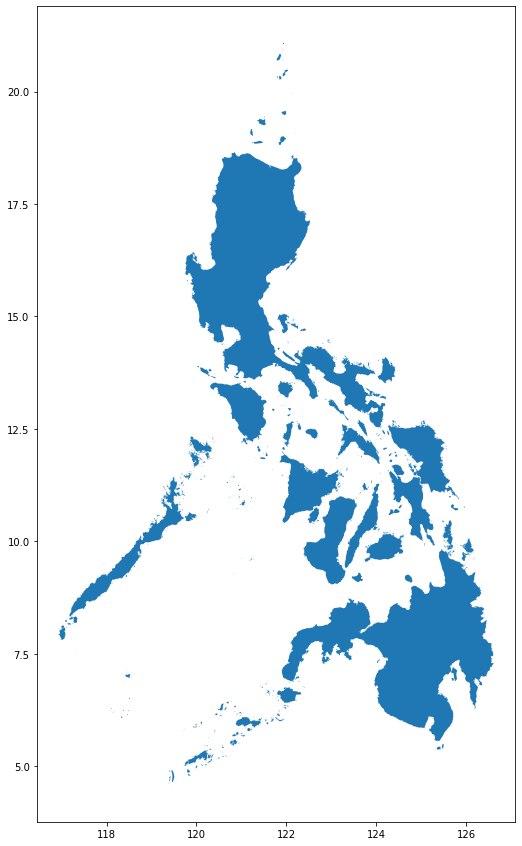

In [0]:
fig, ax = plt.subplots (figsize = (25,15))
The_Philippines.plot(ax=ax)

In [0]:
hostel_points = hostel_data[['Latitude', 'Longitude']].apply(lambda row:
              Point(row["Latitude"], row["Longitude"]), axis=1)

geo_hostels = gpd.GeoDataFrame({"geometry": hostel_points,
			"Hostel Names": hostel_data["Hostel Names"]})

In [0]:
The_Philippines.crs = {'init': 'epsg:4326'}
geo_hostels.crs = {'init': 'epsg:4326'}

Text(0.5, 1, 'Hostels in The Philippines')

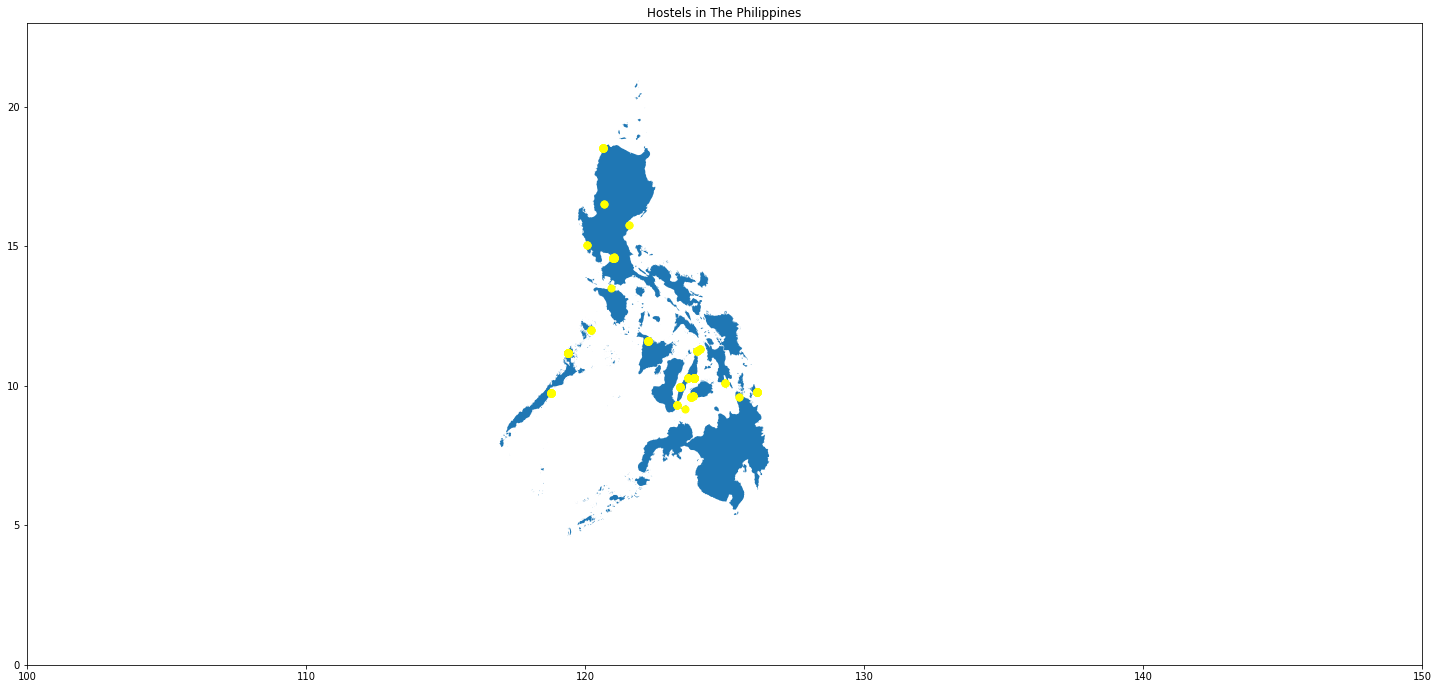

In [0]:
fig, ax = plt.subplots (figsize = (25,15))
base = The_Philippines.plot(ax=ax)
geo_hostels.plot(ax=ax, marker="o",
            markersize=50,
              alpha=1, color = 'yellow')
_ = ax.axis('on')

plt.xlim(100,150)
plt.ylim(0,23)
ax.set_title("Hostels in The Philippines")
